In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('../data/athlete_events.csv')
df = df.drop_duplicates()

In [ ]:
# The age, height, and weight columns are converted to integer values (optional)
df['Age'] = df['Age'].astype('Int64')
df['Height'] = df['Height'].astype('Int64')
df['Weight'] = df['Weight'].astype('Int64')

In [ ]:
# Missing values (at least in Medal, Age, Height, and Weight) are handled
print(df.isnull().mean().sort_values(ascending=False))
df_medals = df[df['Medal'].notna()]

In [11]:
print(df.head())
print(df.info())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

In [59]:
# A dictionary is defined to map each NOC (National Olympic Committee) to its corresponding continent
noc_to_continent = {
    # North America
    'USA': 'North America', 'CAN': 'North America', 'MEX': 'North America', 'CUB': 'North America',
    'BAH': 'North America', 'DOM': 'North America', 'CRC': 'North America', 'HON': 'North America',
    'GUA': 'North America', 'ESA': 'North America', 'NCA': 'North America', 'PAN': 'North America',
    'TTO': 'North America', 'BAR': 'North America', 'HAI': 'North America', 'JAM': 'North America',
    
    # South America
    'BRA': 'South America', 'ARG': 'South America', 'COL': 'South America', 'PER': 'South America',
    'URU': 'South America', 'CHI': 'South America', 'VEN': 'South America', 'ECU': 'South America',
    'BOL': 'South America', 'PAR': 'South America', 'GUY': 'South America', 'SUR': 'South America',

    # Europe
    'GBR': 'Europe', 'FRA': 'Europe', 'GER': 'Europe', 'ITA': 'Europe', 'ESP': 'Europe', 'SWE': 'Europe',
    'NOR': 'Europe', 'FIN': 'Europe', 'DEN': 'Europe', 'NED': 'Europe', 'POL': 'Europe', 'RUS': 'Europe',
    'UKR': 'Europe', 'HUN': 'Europe', 'CZE': 'Europe', 'AUT': 'Europe', 'ROU': 'Europe', 'BEL': 'Europe',
    'SUI': 'Europe', 'BUL': 'Europe', 'YUG': 'Europe', 'SRB': 'Europe', 'CRO': 'Europe', 'SVK': 'Europe',
    'SLO': 'Europe', 'ISL': 'Europe', 'IRL': 'Europe', 'LUX': 'Europe', 'LIE': 'Europe', 'LAT': 'Europe',
    'LTU': 'Europe', 'EST': 'Europe', 'ALB': 'Europe', 'BIH': 'Europe', 'MKD': 'Europe', 'MDA': 'Europe',
    'MON': 'Europe', 'MLT': 'Europe', 'AND': 'Europe',

    # Africa
    'EGY': 'Africa', 'KEN': 'Africa', 'ETH': 'Africa', 'NGR': 'Africa', 'RSA': 'Africa', 'MAR': 'Africa',
    'ALG': 'Africa', 'TUN': 'Africa', 'UGA': 'Africa', 'SEN': 'Africa', 'ZAM': 'Africa', 'ANG': 'Africa',
    'MOZ': 'Africa', 'SUD': 'Africa', 'BOT': 'Africa', 'NAM': 'Africa', 'COD': 'Africa', 'CMR': 'Africa',
    'GHA': 'Africa', 'CIV': 'Africa', 'GUI': 'Africa',

    # Asia
    'CHN': 'Asia', 'JPN': 'Asia', 'KOR': 'Asia', 'PRK': 'Asia', 'IND': 'Asia', 'IRI': 'Asia', 'KAZ': 'Asia',
    'THA': 'Asia', 'MAS': 'Asia', 'PHI': 'Asia', 'INA': 'Asia', 'VIE': 'Asia', 'HKG': 'Asia', 'TPE': 'Asia',
    'SGP': 'Asia', 'QAT': 'Asia', 'UAE': 'Asia', 'JOR': 'Asia', 'SYR': 'Asia', 'LBN': 'Asia', 'KGZ': 'Asia',
    'TJK': 'Asia', 'UZB': 'Asia', 'BAN': 'Asia', 'PAK': 'Asia', 'KSA': 'Asia', 'AFG': 'Asia', 'BRN': 'Asia',
    'MYA': 'Asia', 'MGL': 'Asia', 'NEP': 'Asia', 'CAM': 'Asia', 'TUR': 'Asia', 'ARM': 'Asia', 'GEO': 'Asia',
    'AZE': 'Asia',

    # Oceania
    'AUS': 'Oceania', 'NZL': 'Oceania', 'FIJ': 'Oceania', 'SAM': 'Oceania', 'TGA': 'Oceania', 'PNG': 'Oceania',
    'SOL': 'Oceania', 'VAN': 'Oceania', 'COK': 'Oceania',

    # Other or Historic (optional)
    'EUN': 'Europe',  # Unified Team
    'BOH': 'Europe',  # Bohemia (historical)
    'SCG': 'Europe',  # Serbia and Montenegro
    'GDR': 'Europe',  # East Germany
    'FRG': 'Europe',  # West Germany
    'ANZ': 'Oceania',  # Australasia
    'TCH': 'Europe',  # Czechoslovakia
}

# The continent column is added by mapping NOC codes using the dictionary
df['Continent'] = df['NOC'].map(noc_to_continent)

# The number of missing continent values is checked (optional)
missing = df['Continent'].isna().sum()
print(f"Missing continent values: {missing}")
print(df[df['Continent'].isna()]['NOC'].unique())


Missing continent values: 19819
['CHA' 'BLR' 'GRE' 'URS' 'KUW' 'IRQ' 'UAR' 'LIB' 'ERI' 'TAN' 'LBA' 'DJI'
 'PLE' 'COM' 'BRU' 'MDV' 'YAR' 'CGO' 'ISR' 'ISV' 'SRI' 'BEN' 'SOM' 'NIG'
 'MLI' 'POR' 'PUR' 'TKM' 'MRI' 'SEY' 'MTN' 'SKN' 'VIN' 'LBR' 'PLW' 'TOG'
 'AHO' 'ASA' 'RWA' 'DMA' 'CYP' 'BIZ' 'YMD' 'BER' 'SLE' 'YEM' 'IOA' 'OMA'
 'IVB' 'CAF' 'MAD' 'MAL' 'GUM' 'CAY' 'GBS' 'TLS' 'GAB' 'SMR' 'LAO' 'ROT'
 'CPV' 'CRT' 'GEQ' 'SAA' 'ANT' 'ZIM' 'GRN' 'LCA' 'FSM' 'MAW' 'RHO' 'STP'
 'MNE' 'GAM' 'WIF' 'SWZ' 'BUR' 'NBO' 'BDI' 'ARU' 'NRU' 'VNM' 'BHU' 'MHL'
 'KIR' 'UNK' 'TUV' 'NFL' 'KOS' 'SSD' 'LES']


In [25]:
# The number of medals won by each country is counted to identify the top medal-winning countries
top_medal_countries = df[df['Medal'].notna()]['NOC'].value_counts().head(10)
print(top_medal_countries)

NOC
USA    5637
URS    2503
GER    2165
GBR    2067
FRA    1767
ITA    1637
SWE    1536
CAN    1352
AUS    1320
RUS    1165
Name: count, dtype: int64


In [31]:
# The difference in medal counts between genders is analyzed
gender_medals = df[df['Medal'].notna()].groupby('Sex')['Medal'].count()
print(gender_medals)


Sex
F    11253
M    28519
Name: Medal, dtype: int64


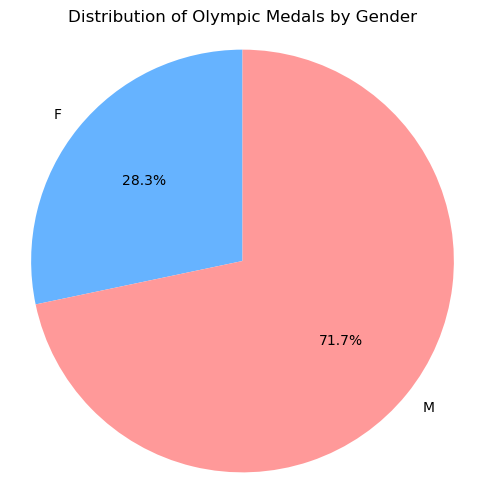

In [29]:
gender_medals = df[df['Medal'].notna()].groupby('Sex')['Medal'].count()
plt.figure(figsize=(6, 6))
plt.pie(gender_medals, labels=gender_medals.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of Olympic Medals by Gender')
plt.axis('equal') 
plt.show()

In [33]:
popular_sports = df['Sport'].value_counts().head(10)
print(popular_sports)

Sport
Athletics               38624
Gymnastics              26707
Swimming                23195
Shooting                11448
Cycling                 10827
Fencing                 10735
Rowing                  10595
Cross Country Skiing     9133
Alpine Skiing            8829
Wrestling                7154
Name: count, dtype: int64


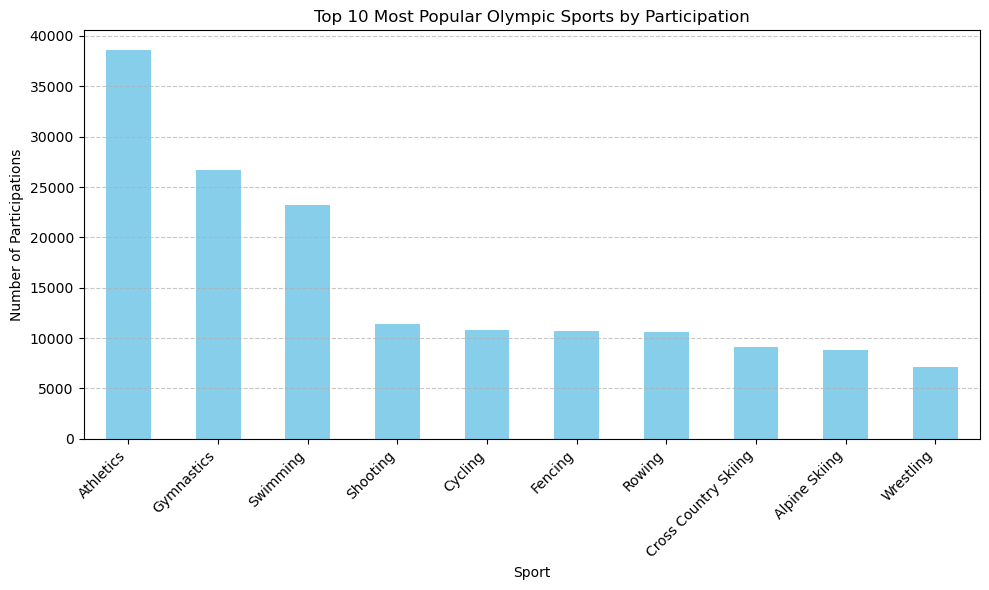

In [35]:
popular_sports = df['Sport'].value_counts().head(10)
plt.figure(figsize=(10, 6))
popular_sports.plot(kind='bar', color='skyblue')
plt.title('Top 10 Most Popular Olympic Sports by Participation')
plt.xlabel('Sport')
plt.ylabel('Number of Participations')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

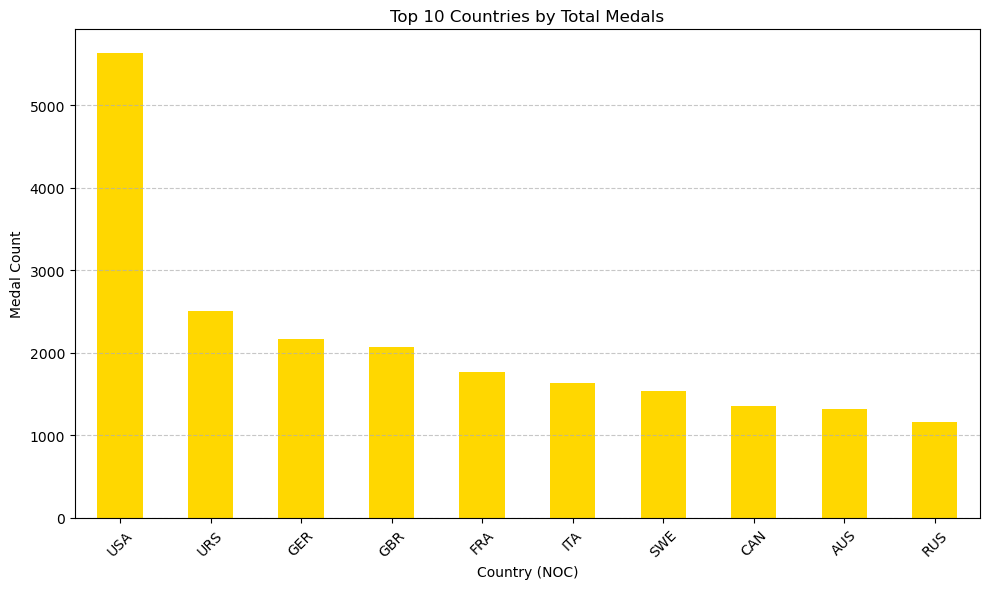

In [37]:
#Total medals per country (Top 10)
medal_counts = df[df['Medal'].notna()].groupby('NOC')['Medal'].count().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
medal_counts.plot(kind='bar', color='gold')
plt.title('Top 10 Countries by Total Medals')
plt.ylabel('Medal Count')
plt.xlabel('Country (NOC)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

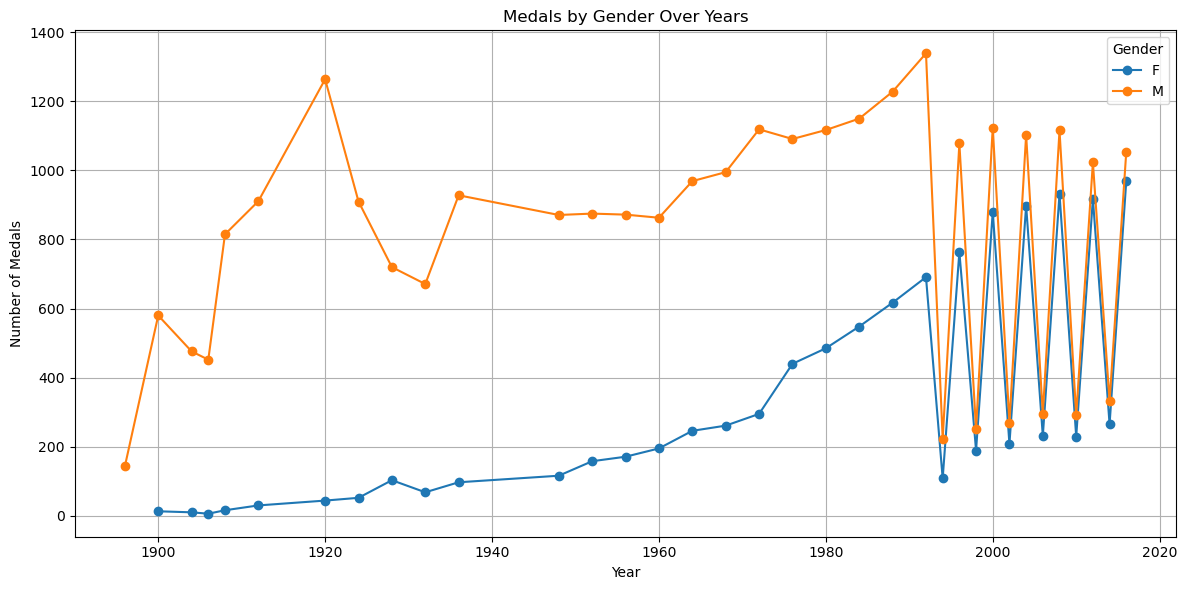

In [39]:
#Gender distribution over years
gender_year = df[df['Medal'].notna()].groupby(['Year', 'Sex'])['Medal'].count().unstack()
gender_year.plot(kind='line', figsize=(12,6), marker='o')
plt.title('Medals by Gender Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

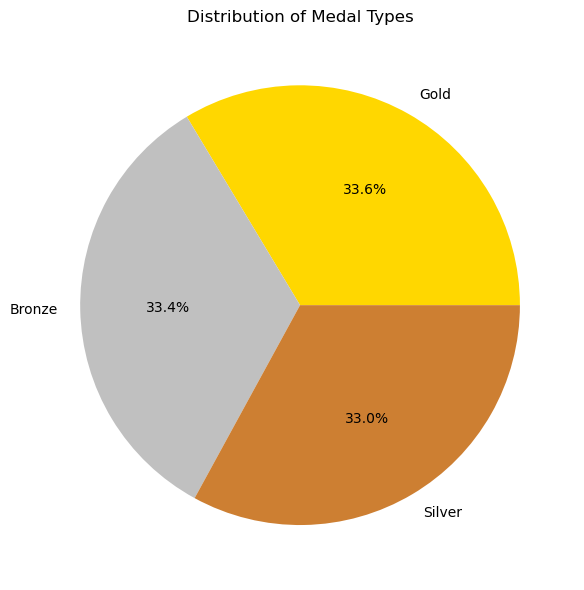

In [41]:
# Medal types distribution
medal_type = df[df['Medal'].notna()]['Medal'].value_counts()
plt.figure(figsize=(6,6))
medal_type.plot(kind='pie', autopct='%1.1f%%', colors=['#FFD700', '#C0C0C0', '#CD7F32'])
plt.title('Distribution of Medal Types')
plt.ylabel('')
plt.tight_layout()
plt.show()

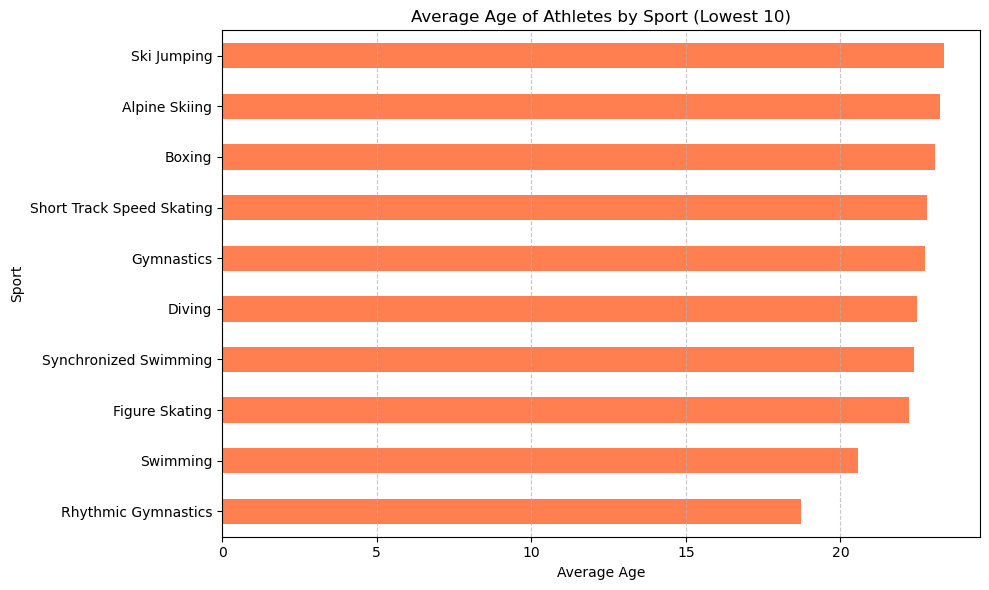

In [43]:
#Average athlete age by sport (Top 10)
avg_age_sport = df[df['Age'].notna()].groupby('Sport')['Age'].mean().sort_values().head(10)
plt.figure(figsize=(10,6))
avg_age_sport.plot(kind='barh', color='coral')
plt.title('Average Age of Athletes by Sport (Lowest 10)')
plt.xlabel('Average Age')
plt.ylabel('Sport')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [61]:
# The most medal-winning sports in each continent are identified
top_sports_by_continent = df[df['Medal'].notna()].groupby(['Continent', 'Sport']).size().reset_index(name='count')
top_sports = top_sports_by_continent.sort_values(['Continent', 'count'], ascending=[True, False])
print(top_sports.groupby('Continent').first())

                   Sport  count
Continent                      
Africa         Athletics    273
Asia              Hockey    367
Europe            Rowing   1878
North America  Athletics   1476
Oceania         Swimming    418
South America   Football    269


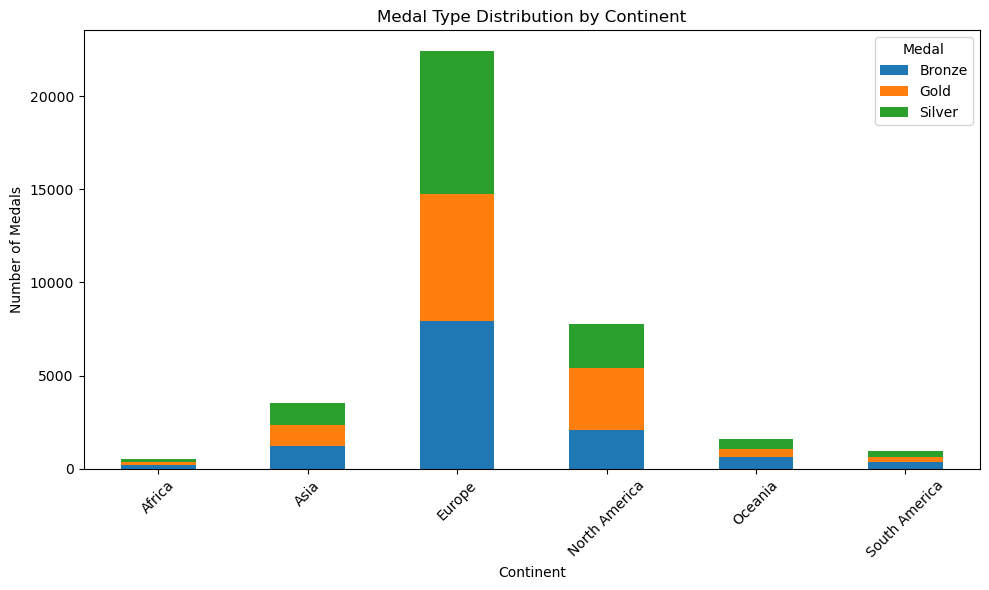

In [65]:
# The distribution of medal types by continent is calculated and visualized using a stacked bar chart
continent_medal_types = df[df['Medal'].notna()].groupby(['Continent', 'Medal']).size().unstack().fillna(0)

continent_medal_types.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Medal Type Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.legend(title='Medal')
plt.tight_layout()
plt.show()

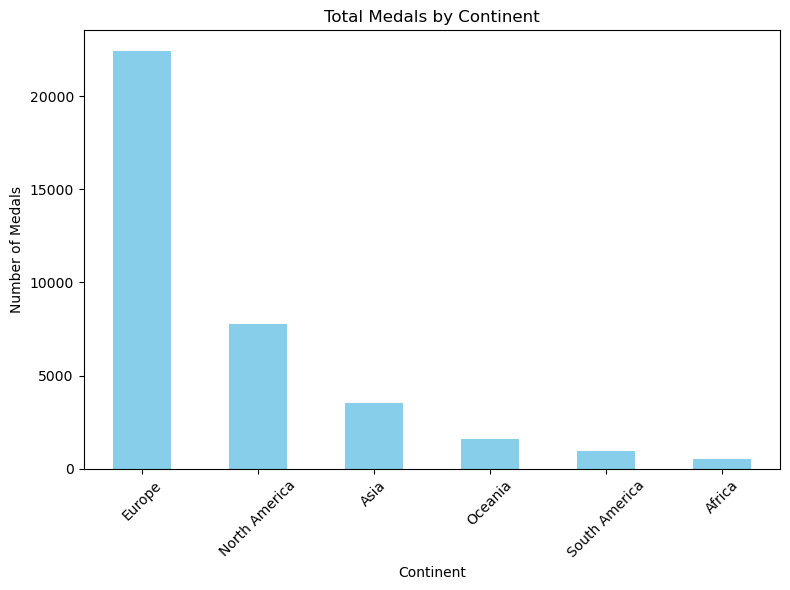

In [75]:
# The total number of medals by continent is calculated and visualized
continent_medals = df[df['Medal'].notna()].groupby('Continent')['Medal'].count().sort_values(ascending=False)

plt.figure(figsize=(8,6))
continent_medals.plot(kind='bar', color='skyblue')
plt.title('Total Medals by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Medals')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

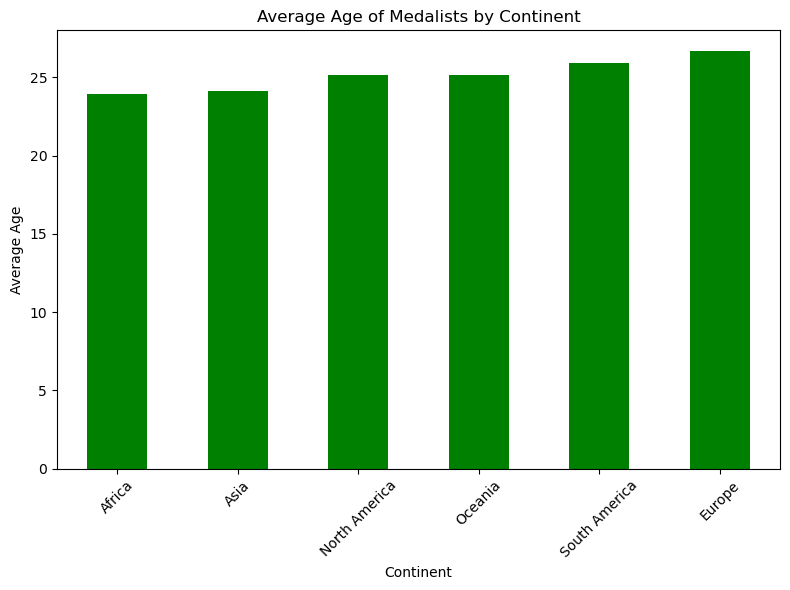

In [67]:
avg_age_by_continent = df[df['Medal'].notna()].groupby('Continent')['Age'].mean().dropna().sort_values()

avg_age_by_continent.plot(kind='bar', color='green', figsize=(8,6))
plt.title('Average Age of Medalists by Continent')
plt.xlabel('Continent')
plt.ylabel('Average Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

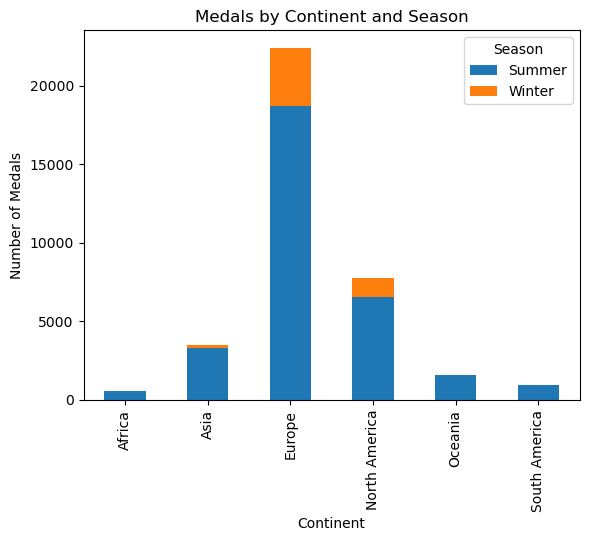

In [69]:
# The difference in medal counts between continents in the Summer and Winter Games is analyzed and visualized
continent_season = df[df['Medal'].notna()].groupby(['Continent', 'Season'])['Medal'].count().unstack()
continent_season.plot(kind='bar', stacked=True, title='Medals by Continent and Season')
plt.ylabel("Number of Medals")
plt.show()


In [71]:
# The most common sport in each continent is identified based on medal counts
top_sports_by_continent = df[df['Medal'].notna()].groupby(['Continent', 'Sport']).size().reset_index(name='Count')
top_sports = top_sports_by_continent.sort_values(['Continent', 'Count'], ascending=[True, False]).groupby('Continent').head(1)
print(top_sports)


         Continent      Sport  Count
1           Africa  Athletics    273
42            Asia     Hockey    367
105         Europe     Rowing   1878
130  North America  Athletics   1476
207        Oceania   Swimming    418
223  South America   Football    269


In [80]:
# The top-performing countries in each continent are identified based on the number of medals won
top_countries_in_continents = df[df['Medal'].notna()].groupby(['Continent', 'NOC'])['Medal'].count().reset_index()
top_per_continent = top_countries_in_continents.sort_values(['Continent', 'Medal'], ascending=[True, False]).groupby('Continent').head(3)
print(top_per_continent)

         Continent  NOC  Medal
12          Africa  RSA    131
7           Africa  KEN    106
11          Africa  NGR     99
22            Asia  CHN    989
29            Asia  JPN    913
32            Asia  KOR    638
65          Europe  GER   2165
63          Europe  GBR   2067
61          Europe  FRA   1767
103  North America  USA   5637
93   North America  CAN   1352
95   North America  CUB    409
105        Oceania  AUS   1320
107        Oceania  NZL    228
104        Oceania  ANZ     29
110  South America  BRA    475
109  South America  ARG    274
118  South America  URU     63


In [82]:
# The most decorated athletes in each continent are identified based on the number of medals won
top_athletes_by_continent = df[df['Medal'].notna()].groupby(['Continent', 'Name'])['Medal'].count().reset_index()
top_athletes = top_athletes_by_continent.sort_values(['Continent', 'Medal'], ascending=[True, False]).groupby('Continent').head(1)
print(top_athletes)

           Continent                     Name  Medal
417           Africa   Tirunesh Dibaba Keneni      6
2447            Asia              Takashi Ono     13
6449          Europe      Edoardo Mangiarotti     13
22719  North America  Michael Fred Phelps, II     28
24799        Oceania         Ian James Thorpe      9
26073  South America           Robert Scheidt      5


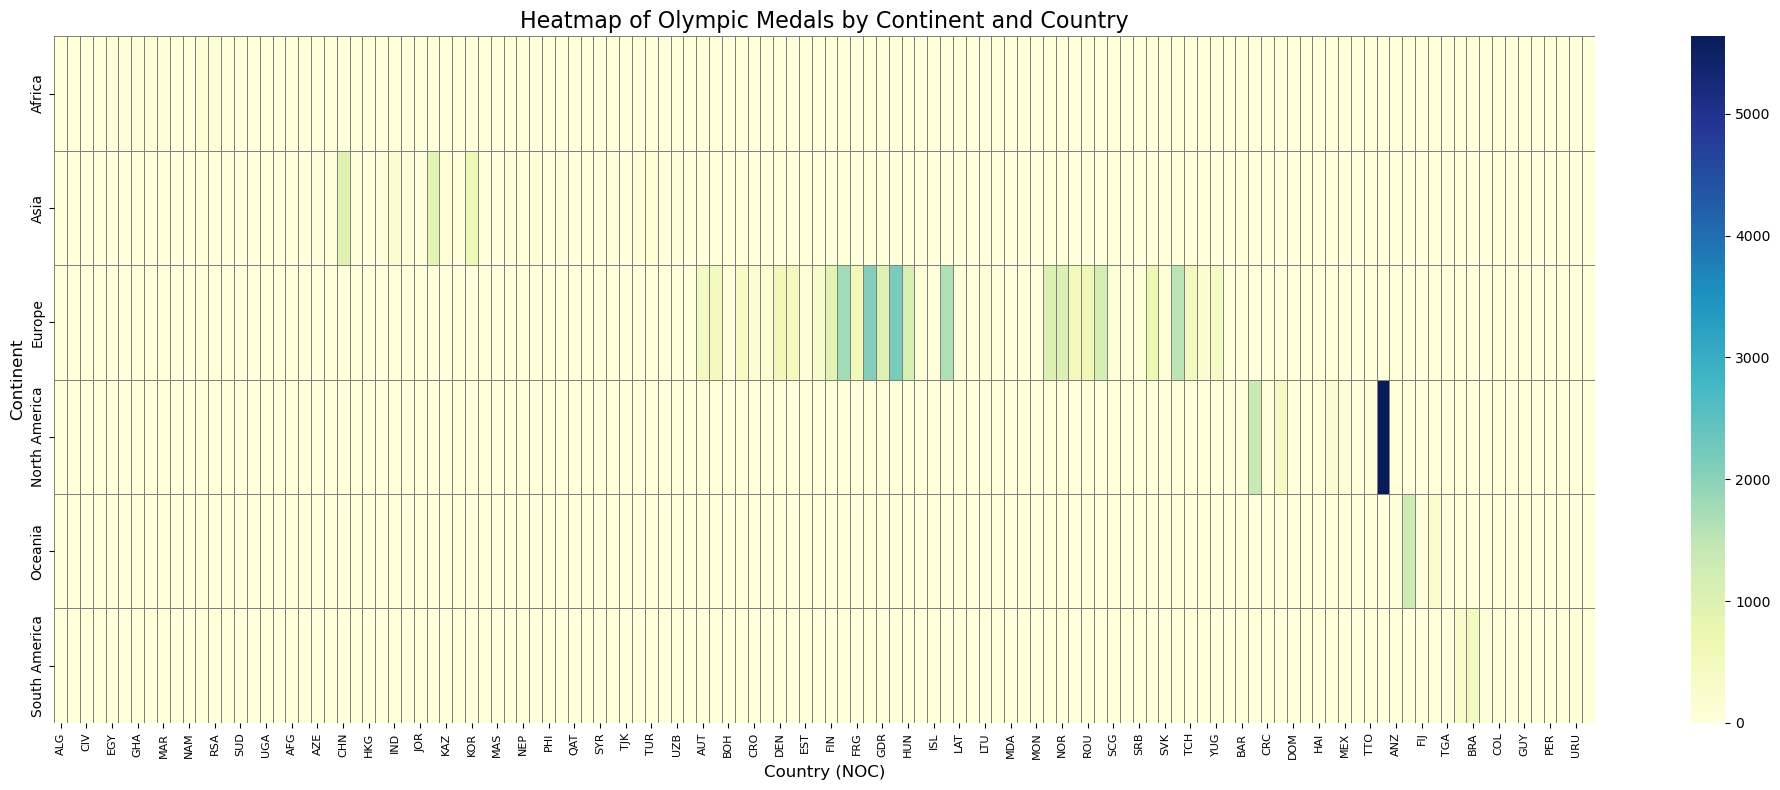

In [96]:
# Medal counts by country and continent are visualized using a heatmap
heatmap_data = df[df['Medal'].notna()]\
    .groupby(['Continent', 'NOC'])['Medal']\
    .count().unstack(fill_value=0)
plt.figure(figsize=(20, 8))  
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Olympic Medals by Continent and Country', fontsize=16)
plt.xlabel('Country (NOC)', fontsize=12)
plt.ylabel('Continent', fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Example: Performance by Continent in Specific Sports
Continent      Africa  Asia  Europe  North America  Oceania  South America
Sport                                                                     
Swimming           30   201    1047           1185      418             26
Athletics         273    86    1658           1476      114             40
Weightlifting      12   193     282             54        4              9
Boxing             57   127     425            218        9             45
Wrestling           7   326     647            168        3              2
Gymnastics          0   288    1465            195        0              4
Shooting            5    98     780            227       13             16
Judo                4   191     234             55        2             26
Rowing              8    29    1878            578      213             12
Fencing             2    55    1426             90        0              6


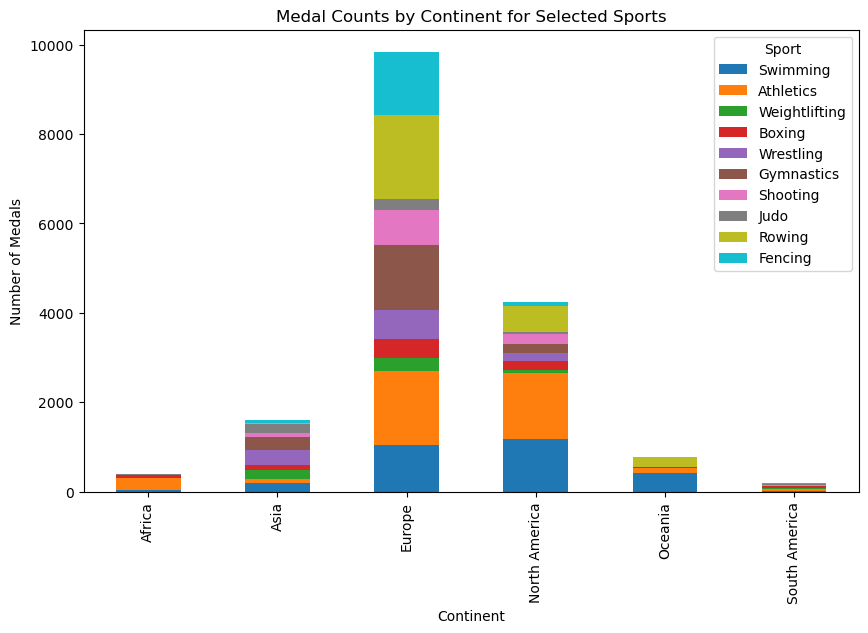

In [94]:
# Continental dominance in specific sports is analyzed and visualized through a comparison of medal counts
continent_sport_summary = df[df['Medal'].notna()].groupby(['Sport', 'Continent'])['Medal'].count().unstack(fill_value=0)
example_sports = ['Swimming', 'Athletics', 'Weightlifting', 'Boxing', 'Wrestling', 
                  'Gymnastics', 'Shooting', 'Judo', 'Rowing', 'Fencing']

print("\nExample: Performance by Continent in Specific Sports")
print(continent_sport_summary.loc[example_sports])

continent_sport_summary.loc[example_sports].T.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Medal Counts by Continent for Selected Sports')
plt.ylabel('Number of Medals')
plt.show()


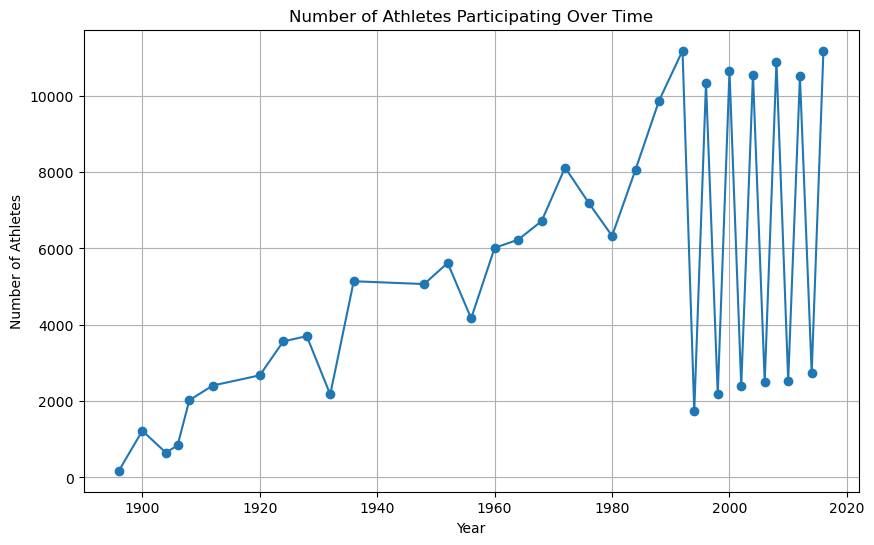

In [98]:
# The evolution of athlete participation over the years is analyzed and visualized
participation_by_year = df.groupby('Year')['ID'].nunique()
participation_by_year.plot(figsize=(10,6), marker='o')
plt.title('Number of Athletes Participating Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(True)
plt.show()

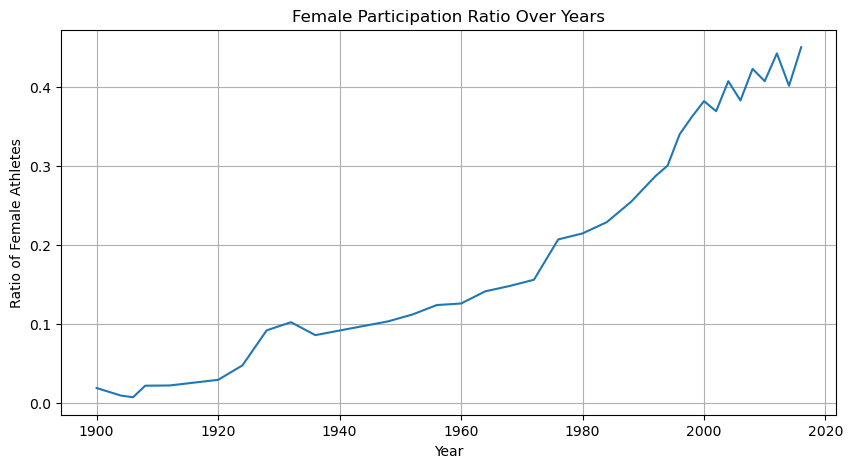

In [100]:
# The ratio of female to male athlete participation is calculated and visualized for each year
gender_ratio = df.groupby(['Year', 'Sex'])['ID'].nunique().unstack()
gender_ratio['Female Ratio'] = gender_ratio['F'] / (gender_ratio['M'] + gender_ratio['F'])
gender_ratio['Female Ratio'].plot(figsize=(10,5), title='Female Participation Ratio Over Years')
plt.ylabel('Ratio of Female Athletes')
plt.grid(True)
plt.show()


In [102]:
# The most decorated athlete in each sport is identified based on the number of medals won
top_athletes_per_sport = df[df['Medal'].notna()].groupby(['Sport', 'Name'])['Medal'].count().sort_values(ascending=False).groupby('Sport').head(1)
print(top_athletes_per_sport)


Sport          Name                              
Swimming       Michael Fred Phelps, II               28
Gymnastics     Larysa Semenivna Latynina (Diriy-)    18
Biathlon       Ole Einar Bjrndalen                   13
Fencing        Edoardo Mangiarotti                   13
Canoeing       Birgit Fischer-Schmidt                12
                                                     ..
Rugby Sevens   Daniel "Dan" Bibby                     1
Aeronautics    Hermann Schreiber                      1
Basque Pelota  Jos de Amzola y Aspiza                 1
Cricket        George John Buckley                    1
Alpinism       Tom George Longstaff                   1
Name: Medal, Length: 66, dtype: int64


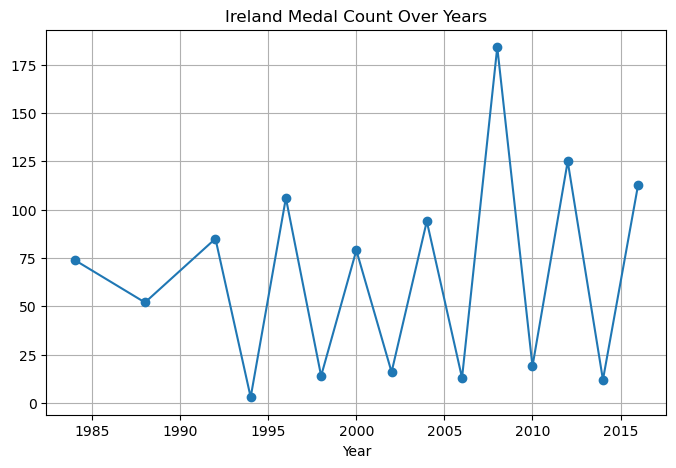

In [116]:
ireland = df[(df['NOC'] == 'IRL') & (df['Medal'].notna())]
ireland_trend = china.groupby('Year')['Medal'].count()
ireland_trend.plot(kind='line', marker='o', figsize=(8,5), title='Ireland Medal Count Over Years')
plt.grid(True)
plt.show()

In [120]:
# The countries (or cities) that have hosted the Olympic Games are identified and analyzed
host_city_counts = df.drop_duplicates(subset=['Year', 'City'])['City'].value_counts()
print(host_city_counts.head(15))


City
London               3
Athina               3
Innsbruck            2
Sankt Moritz         2
Paris                2
Los Angeles          2
Lake Placid          2
Stockholm            2
Amsterdam            1
Berlin               1
Oslo                 1
Cortina d'Ampezzo    1
Melbourne            1
Roma                 1
Moskva               1
Name: count, dtype: int64


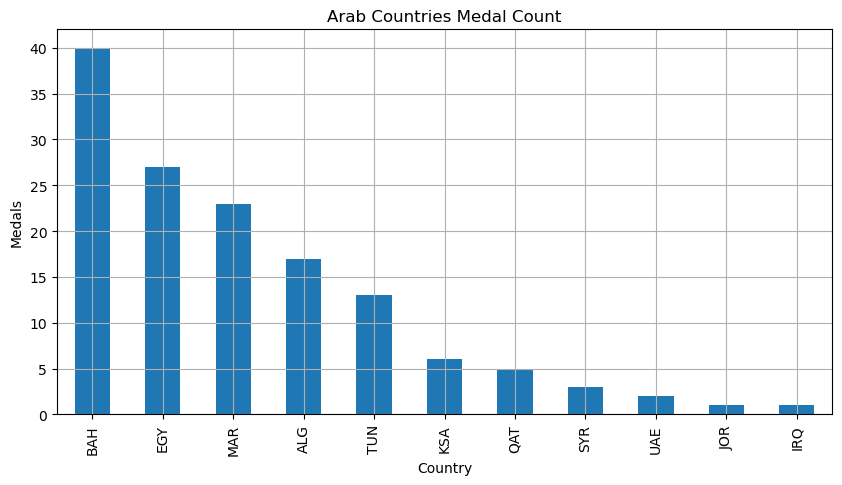

In [122]:
arab_nocs = ['EGY', 'TUN', 'MAR', 'ALG', 'SYR', 'JOR', 'QAT', 'KSA', 'UAE', 'LBN', 'IRQ', 'BAH', 'OMA', 'KWT', 'YEM']
arab_medals = df[df['NOC'].isin(arab_nocs) & df['Medal'].notna()]
arab_medal_counts = arab_medals['NOC'].value_counts()
arab_medal_counts.plot(kind='bar', figsize=(10,5), title='Arab Countries Medal Count')
plt.xlabel('Country')
plt.ylabel('Medals')
plt.grid(True)
plt.show()


In [124]:
# A general analysis is performed to examine the medal distribution for any specified continent

def plot_continent_medals(noc_list, title):
    continent_medals = df[df['NOC'].isin(noc_list) & df['Medal'].notna()]
    continent_medal_counts = continent_medals['NOC'].value_counts()

    plt.figure(figsize=(10,5))
    continent_medal_counts.plot(kind='bar', title=title)
    plt.xlabel('Country')
    plt.ylabel('Number of Medals')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [136]:
# Africa
africa_nocs = [
    'ALG', 'ANG', 'BEN', 'BOT', 'BUR', 'CAF', 'CIV', 'CMR', 'COD', 'CPV', 'DJI', 'EGY',
    'ERI', 'ETH', 'GAB', 'GAM', 'GHA', 'GUI', 'KEN', 'LES', 'LBA', 'LIB', 'MAD', 'MAR',
    'MLI', 'MOZ', 'MRI', 'MTN', 'NAM', 'NGR', 'NIG', 'RWA', 'SEN', 'SEY', 'SLE', 'SOM',
    'SUD', 'SWZ', 'TOG', 'TUN', 'UGA', 'ZAM', 'ZIM', 'RSA']

# Asia
asia_nocs = [
    'AFG', 'BRN', 'BAN', 'BHU', 'BRU', 'CAM', 'CHN', 'HKG', 'IND', 'INA', 'IRI', 'IRQ',
    'ISR', 'JPN', 'JOR', 'KAZ', 'KGZ', 'KOR', 'KUW', 'LAO', 'LIB', 'MAS', 'MDV', 'MGL',
    'MYA', 'NEP', 'OMA', 'PAK', 'PHI', 'PLE', 'PRK', 'QAT', 'KSA', 'SGP', 'SRI', 'SYR',
    'TJK', 'THA', 'TLS', 'TPE', 'TKM', 'UAE', 'UZB', 'VIE', 'YEM']

# Europe
europe_nocs = [
    'ALB', 'AND', 'ARM', 'AUT', 'AZE', 'BEL', 'BIH', 'BLR', 'BUL', 'CRO', 'CYP', 'CZE',
    'DEN', 'ESP', 'EST', 'FIN', 'FRA', 'GEO', 'GBR', 'GER', 'GRE', 'HUN', 'ISL', 'IRL',
    'ISR', 'ITA', 'KOS', 'LAT', 'LIE', 'LTU', 'LUX', 'MDA', 'MKD', 'MLT', 'MON', 'MNE',
    'NED', 'NOR', 'POL', 'POR', 'ROU', 'RUS', 'SMR', 'SRB', 'SVK', 'SLO', 'SUI', 'SWE',
    'TUR', 'UKR', 'VAT']

# North America
north_america_nocs = [
    'ANT', 'BAH', 'BAR', 'BER', 'BIZ', 'CAN', 'CAY', 'CRC', 'CUB', 'DMA', 'DOM', 'ESA',
    'GUA', 'GRN', 'HAI', 'HON', 'ISV', 'JAM', 'LCA', 'MEX', 'NCA', 'PAN', 'PUR', 'SKN',
    'TTO', 'USA', 'VIN']

# South America
south_america_nocs = [
    'ARG', 'BOL', 'BRA', 'CHI', 'COL', 'ECU', 'GUY', 'PAR', 'PER', 'SUR', 'URU', 'VEN']

# Oceania
oceania_nocs = [
    'ASA', 'AUS', 'COK', 'FIJ', 'FSM', 'GUM', 'KIR', 'MHL', 'NRU', 'NZL', 'PLW', 'PNG',
    'SAM', 'SOL', 'TGA', 'TKL', 'TUV', 'VAN']


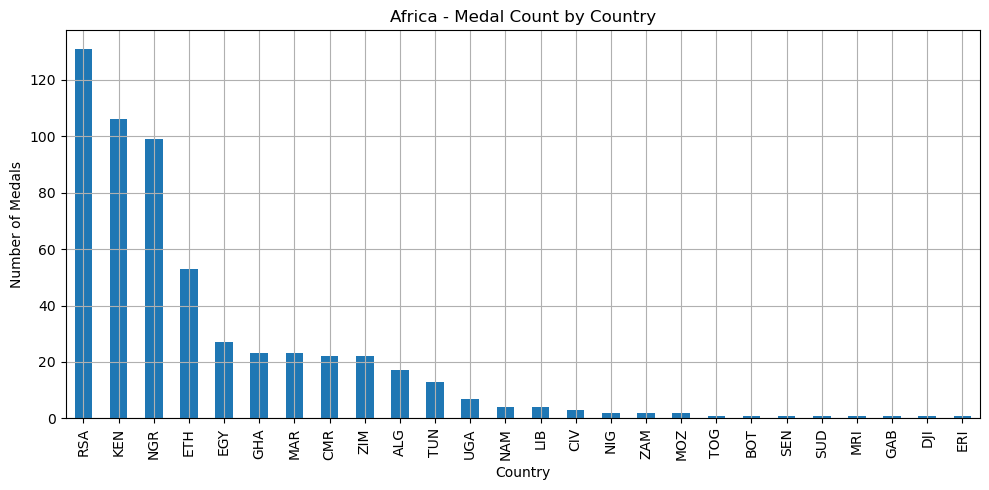

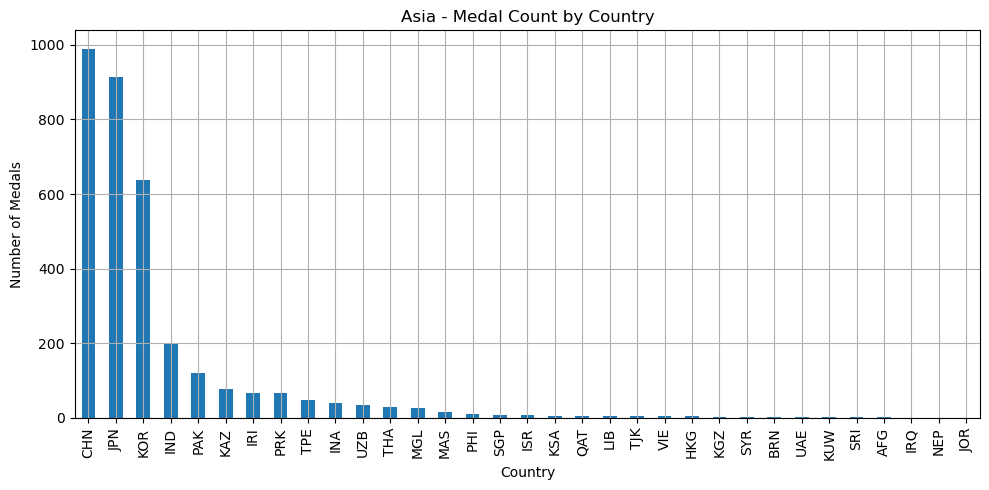

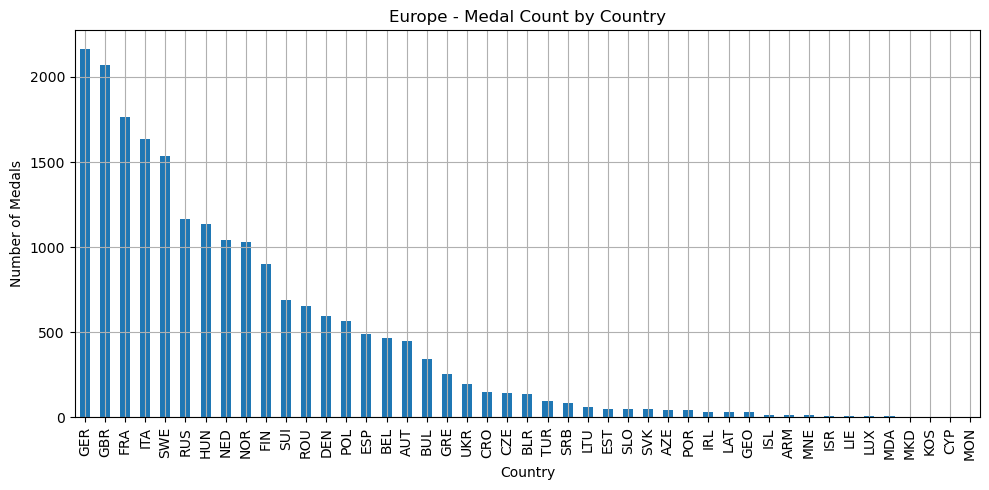

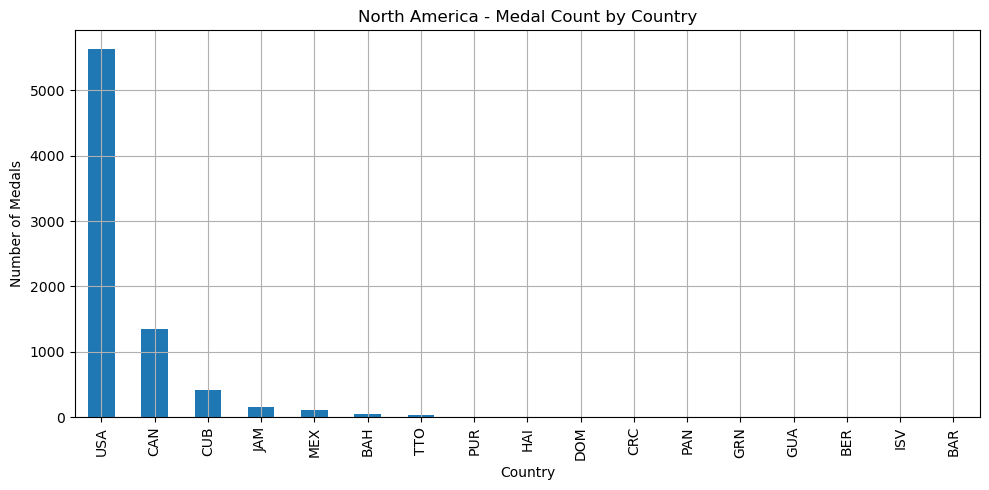

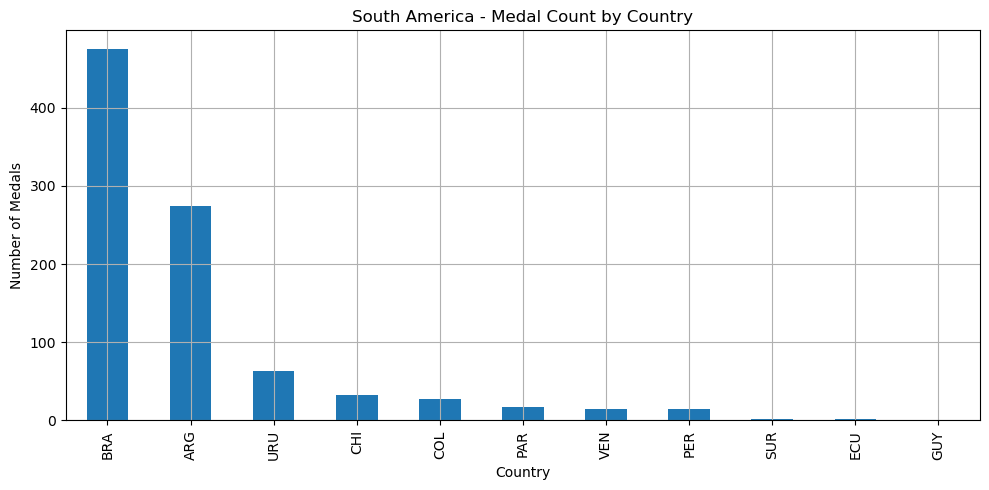

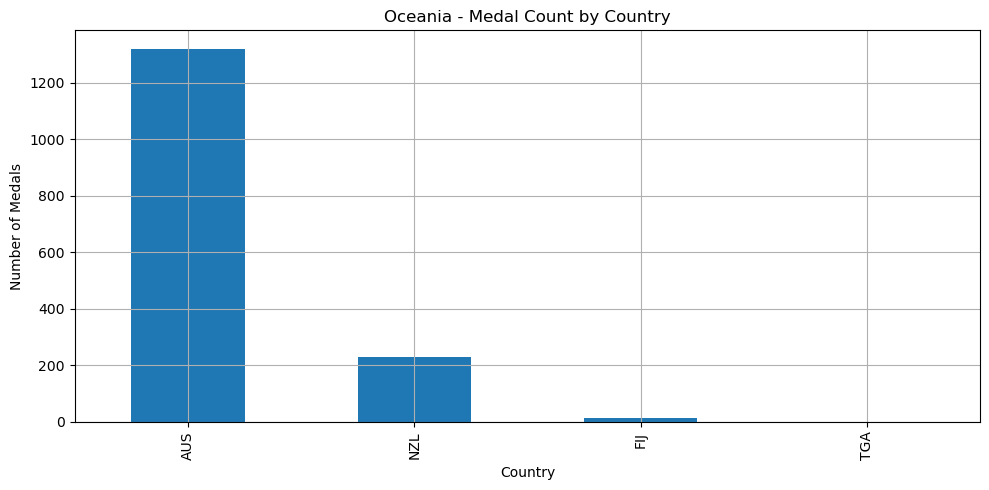

In [138]:
plot_continent_medals(africa_nocs, 'Africa - Medal Count by Country')
plot_continent_medals(asia_nocs, 'Asia - Medal Count by Country')
plot_continent_medals(europe_nocs, 'Europe - Medal Count by Country')
plot_continent_medals(north_america_nocs, 'North America - Medal Count by Country')
plot_continent_medals(south_america_nocs, 'South America - Medal Count by Country')
plot_continent_medals(oceania_nocs, 'Oceania - Medal Count by Country')


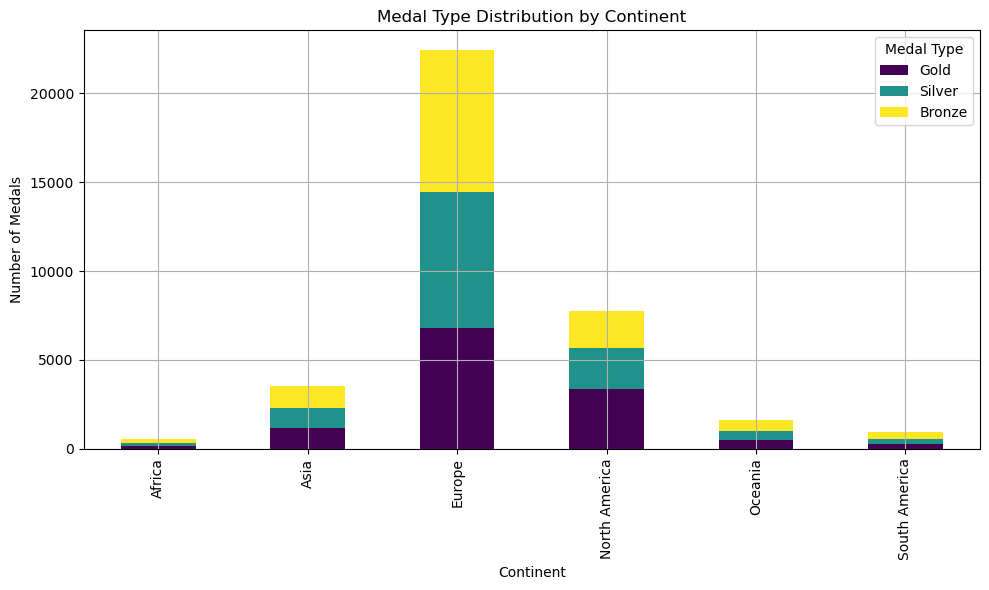

In [140]:

# The distribution of each medal type by continent is calculated and visualized using a stacked bar chart

df_medals = df[df['Medal'].notna()]

continent_medal_types = df_medals.groupby(['Continent', 'Medal']).size().unstack(fill_value=0)

continent_medal_types = continent_medal_types[['Gold', 'Silver', 'Bronze']]

continent_medal_types.plot(kind='bar', stacked=True, figsize=(10,6), colormap='viridis')
plt.title('Medal Type Distribution by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Medals')
plt.legend(title='Medal Type')
plt.grid(True)
plt.tight_layout()
plt.show()